<h><b>ffffffВариант 37</b></h>
Между страной Х и страной У идет война. Численность состава войск 
исчисляется от начала войны, и являются временными функциями x(t) и
y(t). 
В начальный момент времени страна Х имеет армию численностью 895 000 человек,
а в распоряжении страны У армия численностью в 577 000 человек. 
Для упрощения модели считаем, что коэффициенты a, b, c, h, постоянны. 
Также считаем P(е) и Q(е) непрерывные функции.

In [91]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [92]:
x0 = 895000   #численность первой армии
y0 =  577000  #численность второй армии

<b>1) Модель боевых действий между регулярными войсками</b>

In [93]:
a = 0.34    #константа, характеризующая степень влияния различных факторов на потери армии x
b = 0.93    #эффективность боевых действий армии у
c = 0.54    #эффективность боевых действий армии х
h = 0.29    #константа, характеризующая степень влияния различных факторов на потери армии y

In [94]:
t0 = 0      #начальный момент времени
tmax = 4    #предельный момент времени
dt = 0.05    #шаг измерения времени
t = np.arange(t0, tmax, dt)
tborders = [t0, tmax]

In [95]:
#возможность подхода подкрепления к армии х
def P(t):    
    return 2*np.sin(t)

In [96]:
#возможность подхода подкрепления к армии у
def Q(t):
    return np.cos(t) + 3

In [97]:
#система дифференциальных уравнений
def syst(t, y):
    return [-a*y[0] - b*y[1] + P(t), -c*y[0] - h*y[1] + Q(t)]   #изменение численности первой и второй армии

In [98]:
v0 = [x0, y0]   #вектор начальных условий

In [113]:
y = solve_ivp(syst, tborders, v0, t_eval=t)   #решение системы на промежутке t

In [153]:
#избавляемся от отрицательных значений
for k in range(len(y.y)):
    for i, val in enumerate(y.y[k]):
        if val < 0:
            y.y[k][i] = 0

([<matplotlib.axis.YTick at 0x20c4a734370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

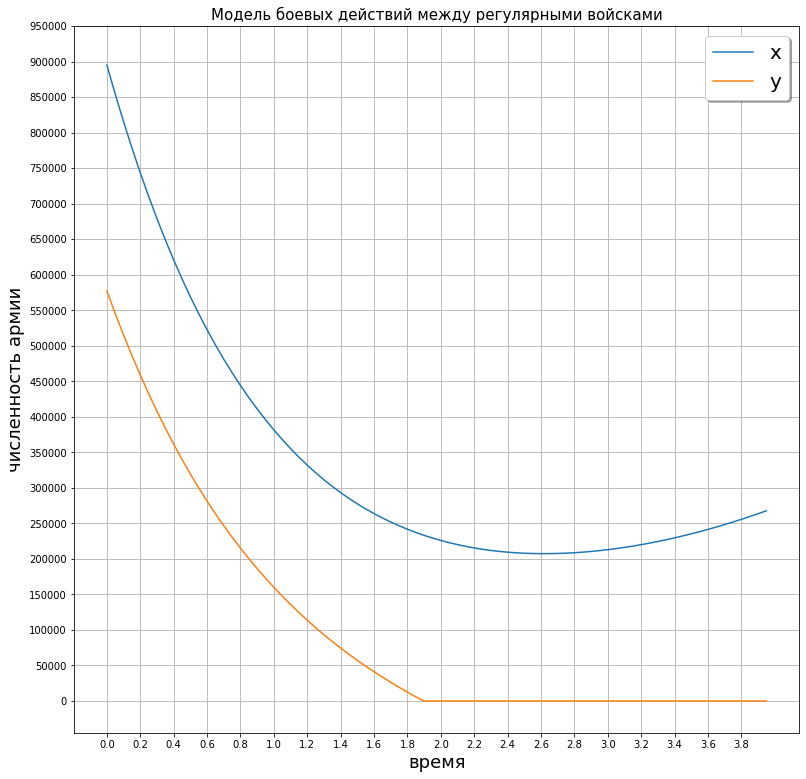

In [158]:
plt.figure(figsize=(13, 13))
plt.plot(y.t, y.y.T)
plt.grid()
plt.xlabel('время', fontsize=18)
plt.ylabel('численность армии', fontsize=18)
plt.legend(['x', 'y'], shadow=True, fontsize=20)
plt.title('Модель боевых действий между регулярными войсками', fontsize=15)
plt.xticks(np.arange(t0, tmax, step=0.2))
plt.yticks(np.arange(0, 1000000, step=50000))

<b>2) Модель ведения боевых действий с участием регулярных войск и партизанских отрядов </b>

In [159]:
a = 0.31    #константа, характеризующая степень влияния различных факторов на потери армии x
b = 0.88    #эффективность боевых действий армии у
c = 0.41    #эффективность боевых действий армии х
h = 0.41    #константа, характеризующая степень влияния различных факторов на потери армии y

In [160]:
t0 = 0      #начальный момент времени
tmax = 1    #предельный момент времени
dt = 0.05    #шаг измерения времени
t = np.arange(t0, tmax, dt)
tborders = [t0, tmax]

In [161]:
#система дифференциальных уравнений
def syst2(t, y):
    return [-a*y[0] - b*y[1] + P(t), -c*y[0]*y[1] - h*y[1] + Q(t)]   #изменение численности первой и второй армии

In [162]:
y = solve_ivp(syst2, tborders, v0, t_eval=t)   #решение системы на промежутке t

([<matplotlib.axis.YTick at 0x20c4a89b1f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

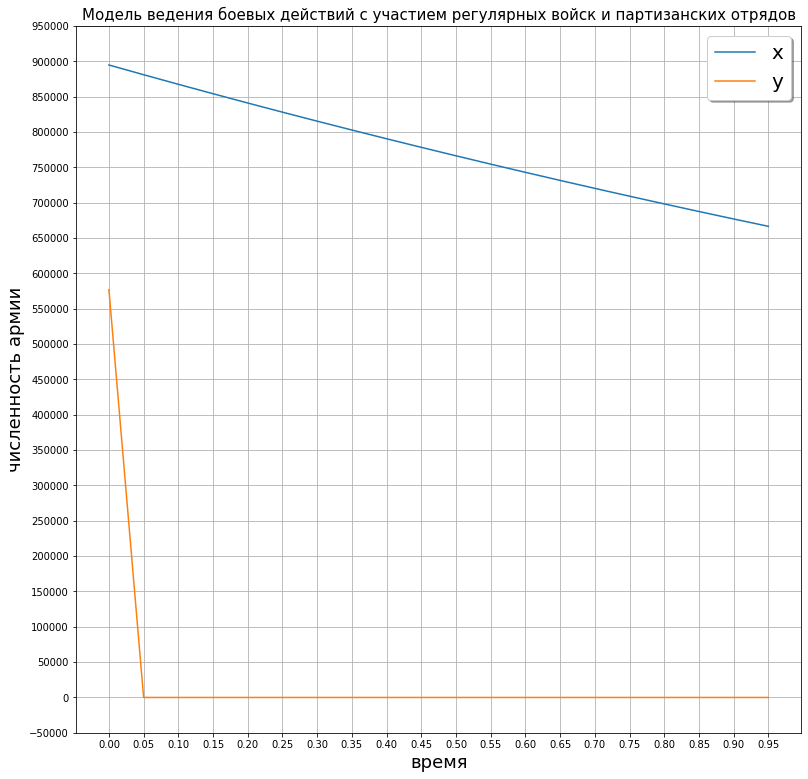

In [163]:
plt.figure(figsize=(13, 13))
plt.plot(y.t, y.y.T)
plt.grid()
plt.xlabel('время', fontsize=18)
plt.ylabel('численность армии', fontsize=18)
plt.legend(['x', 'y'], shadow=True, fontsize=20)
plt.title('Модель ведения боевых действий с участием регулярных войск и партизанских отрядов', fontsize=15)
plt.xticks(np.arange(t0, tmax, step=0.05))
plt.yticks(np.arange(-50000, 1000000, step=50000))